# The Adult Income Dataset
## Description
### Title of dataset: adult.csv
#### Sources:
* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 
#### Number of Instances
* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
#### Number of Attributes/Fearures/Columns
 6 continuous, 8 nominal attributes. 
#### Attribute Information/Fearures/Columns
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 
#### Missing Values:
 7% rows have missing values.
 #### Download the Dataset file(.csv) from here:
https://drive.google.com/file/d/17yZ1NSSsRrDF7qfGOJyGHRDDiBce7EQN/view?usp=sharing

## Objective: 
### Design a Machine Learnring Model  on the Adult data set and predict their income.

In [79]:
#Import the all requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [107]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [108]:
row, col = df.shape
print('Rows: ',row)
print("columns: ",col)

Rows:  48842
columns:  15


In [109]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Discover and Handle the missing values

In [111]:
missing_val = ['n/a','?','-']
df = pd.read_csv('adult.csv', na_values = missing_val)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [112]:
with_na = 100*(df.isnull().sum(axis = 0)/len(df.index))
with_na

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [113]:
df.dropna(axis = 0, how = 'any', inplace = True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [114]:
shape = df.shape 
new_row = shape[0]
new_row

45222

In [115]:
without_na = 100*(df.isnull().sum(axis = 0)/len(df.index))
without_na

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [116]:
# find the percentage of removed rows
removed_rows = (row - new_row)/row*100
print(removed_rows)

7.411653904426519


## Data Cleaning

In [117]:
# Remove unnecessary columns
df.drop('fnlwgt' , axis = 1, inplace = True)
df.drop('educational-num', axis=1, inplace=True)
df.drop('capital-gain', axis=1, inplace=True)
df.drop('capital-loss', axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [118]:
df.shape

(45222, 11)

## Data Preparation

In [121]:
# select all numeric (float and int) type column in the dataset
adult_numeric = df.select_dtypes(include=['float64', 'int64'])
adult_numeric.head()

,age,hours-per-week
0,25,40
1,38,50
2,28,40
3,44,40
5,34,30


In [122]:
categorical = df.select_dtypes( include=['object'] )

categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [123]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numerical = pd.DataFrame(scaler.fit_transform(adult_numeric), 
                      columns = adult_numeric.columns)

df_numerical.head()

,age,hours-per-week
0,-1.024983,-0.078120
1,-0.041455,0.754701
2,-0.798015,-0.078120
3,0.412481,-0.078120
4,-0.344079,-0.910942


In [124]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

df_category = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_category.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [125]:
df = pd.concat([df_numerical, df_category], axis=1)

df.head()

,age,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [128]:
y = df.pop('income_>50K')
X = df

In [131]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31655, 92) (31655,)
(13567, 92) (13567,)


## Build the ML Models

In [133]:
# Ingore Warnings
import warnings
warnings.filterwarnings('ignore')

In [134]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred = classifier.predict(X_test)

In [136]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8338615758826564

In [137]:
#Checking report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     10211
         1.0       0.70      0.57      0.63      3356

    accuracy                           0.83     13567
   macro avg       0.79      0.74      0.76     13567
weighted avg       0.83      0.83      0.83     13567



### Feature Elimination using RFE


In [139]:
from sklearn.linear_model import LogisticRegression
classifier_temp = LogisticRegression()

In [140]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier_temp, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

In [141]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,age,False,5
1,hours-per-week,False,3
2,workclass_Local-gov,False,14
3,workclass_Private,False,15
4,workclass_Self-emp-inc,False,32
...,...,...,...
87,native-country_Thailand,True,1
88,native-country_Trinadad&Tobago,True,1
89,native-country_United-States,False,21
90,native-country_Vietnam,True,1


In [142]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['workclass_Without-pay', 'education_1st-4th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'gender_Male',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Dominican-Republic',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Guatemala',
       'native-country_Hungary

In [143]:
X_train_new = X_train[imp_col]
X_train_new.head()

,workclass_Without-pay,education_1st-4th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,...,native-country_Laos,native-country_Mexico,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Scotland,native-country_South,native-country_Thailand,native-country_Trinadad&Tobago,native-country_Vietnam,native-country_Yugoslavia
25079,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
from sklearn.linear_model import LogisticRegression
classifier_new = LogisticRegression()
classifier_new.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
y_train_pred_new = classifier_new.predict(X_train_new)

In [146]:
X_test_new = X_test[imp_col]
y_test_pred_new = classifier_new.predict(X_test_new)

In [147]:
temp_df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_new})
temp_df_new

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,0.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [148]:
y_train_pred_new = classifier_new.predict(X_train_new)

print(metrics.r2_score(y_test, y_test_pred_new))

0.06684630692857452


In [149]:
#Checking report
print(metrics.classification_report(y_test, y_test_pred_new))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89     10211
         1.0       0.71      0.50      0.59      3356

    accuracy                           0.83     13567
   macro avg       0.78      0.72      0.74     13567
weighted avg       0.82      0.83      0.82     13567



### Use of PCA

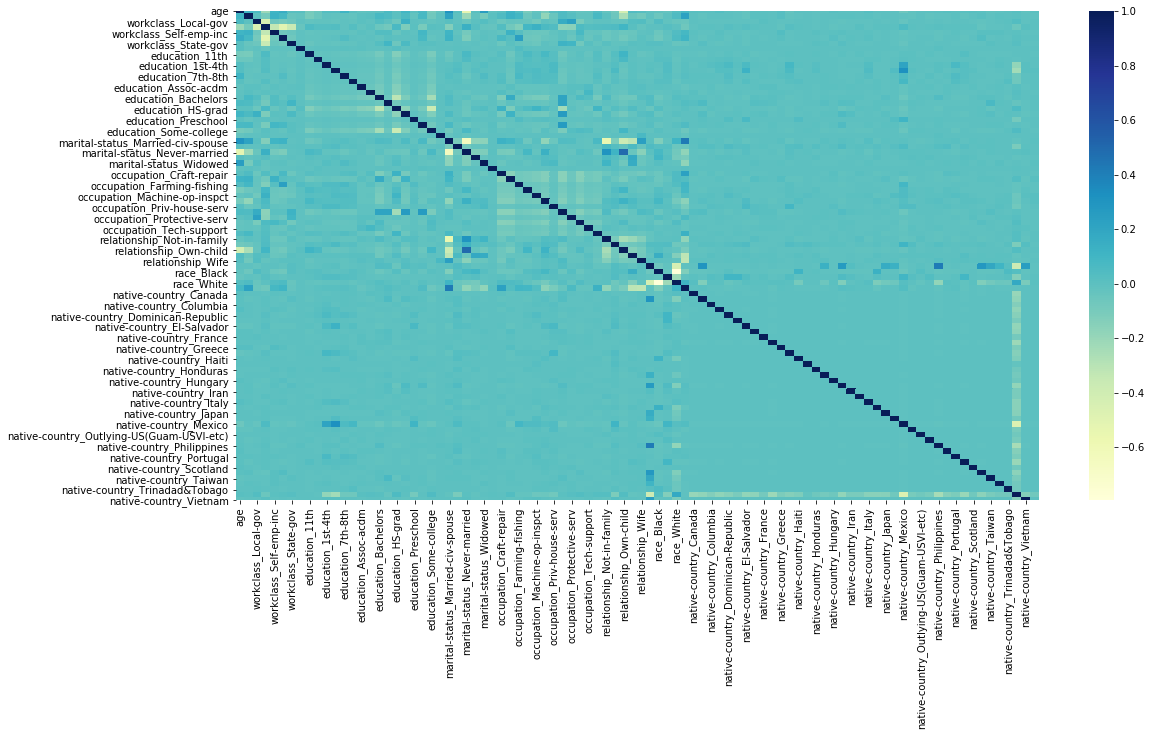

In [150]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")

In [155]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [156]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

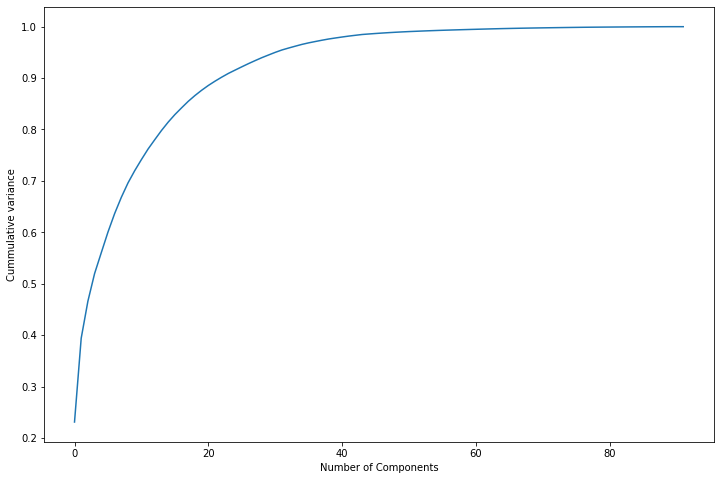

In [157]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [158]:
np.cumsum(pca.explained_variance_ratio_)

array([0.23089365, 0.39393292, 0.46590283, 0.51965952, 0.56023949,
       0.60038257, 0.6364975 , 0.66810754, 0.69615795, 0.71987107,
       0.74146171, 0.76205711, 0.78024542, 0.79802522, 0.8142827 ,
       0.82892681, 0.84205705, 0.85475659, 0.86603295, 0.87626568,
       0.88560947, 0.89397937, 0.90178094, 0.90907726, 0.91551532,
       0.92187595, 0.92809891, 0.93399439, 0.93970641, 0.94491164,
       0.95002666, 0.95467113, 0.9584542 , 0.96205577, 0.96555608,
       0.96853934, 0.97115503, 0.97368966, 0.97605616, 0.97802401,
       0.9799202 , 0.98170898, 0.98327565, 0.98481583, 0.98580579,
       0.98674883, 0.98762465, 0.98843624, 0.9891804 , 0.98986706,
       0.99048861, 0.99103303, 0.99157231, 0.99207821, 0.99255029,
       0.99300464, 0.99340865, 0.99380246, 0.99419097, 0.99456653,
       0.99493227, 0.99528845, 0.9956393 , 0.99597523, 0.99628752,
       0.99656183, 0.99682978, 0.9970809 , 0.99731333, 0.99753037,
       0.99773921, 0.99793968, 0.99813263, 0.99831652, 0.99849

In [159]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 15, random_state = 0)
X_train_pca = pca_final.fit_transform(X_train)

In [160]:
X_train_pca.shape

(31655, 15)

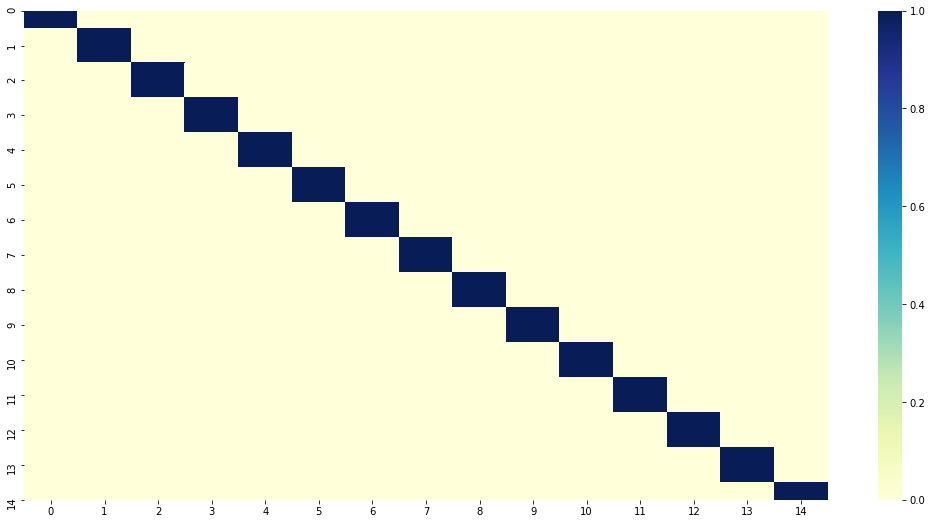

In [161]:
corrmat = np.corrcoef(X_train_pca.T)
plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [162]:
X_test_pca = pca_final.transform(X_test)

### 1. Logistic Regression¶

In [163]:
from sklearn.linear_model import LogisticRegression

classifier_pca = LogisticRegression()

classifier_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
# Prediction
y_test_pred_pca = classifier_pca.predict(X_test_pca)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})
temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0


In [165]:
metrics.r2_score(y_test, y_test_pred_pca)

0.04427958630699147

In [166]:
# checking report
print(metrics.classification_report(y_test, y_test_pred_pca))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     10211
         1.0       0.68      0.53      0.59      3356

    accuracy                           0.82     13567
   macro avg       0.77      0.72      0.74     13567
weighted avg       0.81      0.82      0.81     13567



### 2. KNN

In [167]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [168]:
y_pred_knn = classifier_knn.predict(X_test_pca)

In [169]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_knn)

0.8068106434731334

In [170]:
#Checking report
print(metrics.classification_report(y_test, y_pred_knn))
        

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     10211
         1.0       0.62      0.57      0.59      3356

    accuracy                           0.81     13567
   macro avg       0.74      0.73      0.73     13567
weighted avg       0.80      0.81      0.80     13567

